## Project Description

You are an analyst at Megaline, a federal mobile network operator. The company offers two tariff plans: Smart and Ultra. To optimize the advertising budget, the commercial department wants to understand which plan generates more revenue.
You are tasked with a preliminary analysis of the plans on a small sample of clients. The dataset contains information about 500 Megaline users: who they are, where they live, which tariff they use, and how many calls and messages each sent during 2018. You need to analyze customer behavior and make a conclusion about which tariff is better.
    
#### Tariff Descriptions

"Smart Plan"

Monthly fee: 550 RUB

Included: 500 minutes, 50 messages, 15 GB of internet traffic

Extra charges:

Minute of calls: 3 RUB

Message: 3 RUB

1 GB of internet: 200 RUB

"Ultra" Plan

Monthly fee: 1950 RUB

Included: 3000 minutes, 1000 messages, 30 GB of internet traffic

Extra charges:

Minute of calls: 1 RUB

Message: 1 RUB

1 GB of internet: 150 RUB

#### Data Description

Table: users (user information)

user_id — unique user identifier

first_name — user’s first name

last_name — user’s last name

age — user’s age (years)

reg_date — date the tariff was activated (day, month, year)

churn_date — date the tariff was discontinued (if missing, the tariff was still active at the time of data extraction)

city — city of residence

tariff — tariff plan name

Table: calls (call information)

id — unique call identifier

call_date — call date

duration — call duration in minutes

user_id — ID of the user who made the call

Table: messages (message information)

id — unique message identifier

message_date — message date

user_id — ID of the user who sent the message

Table: internet (internet session information)

id — unique session identifier

mb_used — amount of internet traffic used per session (in megabytes)

session_date — session date

user_id — ID of the user

Table: tariffs (tariff information)

tariff_name — name of the tariff

rub_monthly_fee — monthly subscription fee (RUB)

minutes_included — number of included minutes per month

messages_included — number of included messages per month

mb_per_month_included — included internet traffic per month (megabytes)

rub_per_minute — cost per extra minute beyond the included minutes

rub_per_message — cost per extra message beyond the included messages

rub_per_gb — cost per extra gigabyte of internet beyond the included traffic (1 GB = 1024 MB)

In [7]:
import pandas as pd
import numpy as np
df_calls = pd.read_csv('/Users/fidanb/Downloads/yandex praktikum/all datasets/calls.csv')
df_calls.to_csv('calls.csv')
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [8]:
df_internet = pd.read_csv('/Users/fidanb/Downloads/yandex praktikum/all datasets/internet.csv')
df_internet.to_csv('internet.csv')
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [9]:
df_messages = pd.read_csv('/Users/fidanb/Downloads/yandex praktikum/all datasets/messages.csv')
df_messages.to_csv('messages.csv')
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [10]:
df_tariffs = pd.read_csv('/Users/fidanb/Downloads/yandex praktikum/all datasets/tariffs.csv')
df_tariffs.to_csv('tariffs.csv')
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [11]:
df_users = pd.read_csv('/Users/fidanb/Downloads/yandex praktikum/all datasets/users.csv')
df_users.to_csv('users.csv')
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [12]:
for row in df_calls, df_internet, df_messages, df_tariffs, df_users:
    print("============================================================")
    print("INFO")
    row.info()
    print("============================================================")
    print("DESCRIBE")
    print(row.describe())

INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
DESCRIBE
            duration        user_id
count  202607.000000  202607.000000
mean        6.755887    1253.940619
std         5.843365     144.722751
min         0.000000    1000.000000
25%         1.300000    1126.000000
50%         6.000000    1260.000000
75%        10.700000    1379.000000
max        38.000000    1499.000000
INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(

### Conclusion

1. I created 5 datasets, which have almost no missing values.
2. Columns ['mb_used'] and ['duration'] contain 0 values.
3. The column ['user_id'] has integer type.
4. Columns ['date_time'], ['reg_date'], and ['churn_date'] have object type.

### Step 2. Prepare the Data
#### Convert data to the appropriate types.
#### Identify and correct errors in the data.

In [13]:
import datetime as dt

In [14]:
df_calls['duration'] = np.ceil(df_calls['duration'])
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000


In [15]:
df_calls['call_date_modified'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_calls['month'] = df_calls['call_date_modified'].dt.month
df_calls.head()

,id,call_date,duration,user_id,call_date_modified,month
0,1000_0,2018-07-25,0.0,1000,2018-07-25,7
1,1000_1,2018-08-17,0.0,1000,2018-08-17,8
2,1000_2,2018-06-11,3.0,1000,2018-06-11,6
3,1000_3,2018-09-21,14.0,1000,2018-09-21,9
4,1000_4,2018-12-15,6.0,1000,2018-12-15,12


Imported the datetime module and extracted only the month into a separate column.

In [16]:
df_calls = df_calls.drop(columns=['call_date','call_date_modified'])
df_calls.head()

,id,duration,user_id,month
0,1000_0,0.0,1000,7
1,1000_1,0.0,1000,8
2,1000_2,3.0,1000,6
3,1000_3,14.0,1000,9
4,1000_4,6.0,1000,12


I wrote a function that converts the float values in the ['duration'] column to minutes.

In [17]:
#del df_calls['duration']
df_calls.head()

,id,duration,user_id,month
0,1000_0,0.0,1000,7
1,1000_1,0.0,1000,8
2,1000_2,3.0,1000,6
3,1000_3,14.0,1000,9
4,1000_4,6.0,1000,12


In [18]:
df_messages['messages_date_modified'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_messages['month'] = df_messages['messages_date_modified'].dt.month
df_messages.head()

,id,message_date,user_id,messages_date_modified,month
0,1000_0,2018-06-27,1000,2018-06-27,6
1,1000_1,2018-10-08,1000,2018-10-08,10
2,1000_2,2018-08-04,1000,2018-08-04,8
3,1000_3,2018-06-16,1000,2018-06-16,6
4,1000_4,2018-12-05,1000,2018-12-05,12


In [19]:
df_messages = df_messages.drop(columns=['message_date','messages_date_modified'])

In [20]:
df_messages.head()

,id,user_id,month
0,1000_0,1000,6
1,1000_1,1000,10
2,1000_2,1000,8
3,1000_3,1000,6
4,1000_4,1000,12


In [21]:
df_internet['internet_SS_date_modified'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_internet['month'] = df_internet['internet_SS_date_modified'].dt.month
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,internet_SS_date_modified,month
0,0,1000_0,112.95,2018-11-25,1000,2018-11-25,11
1,1,1000_1,1052.81,2018-09-07,1000,2018-09-07,9
2,2,1000_2,1197.26,2018-06-25,1000,2018-06-25,6
3,3,1000_3,550.27,2018-08-22,1000,2018-08-22,8
4,4,1000_4,302.56,2018-09-24,1000,2018-09-24,9


In [22]:
df_internet = df_internet.drop(columns=['session_date','internet_SS_date_modified'])

In [23]:
df_internet.head()

,Unnamed: 0,id,mb_used,user_id,month
0,0,1000_0,112.95,1000,11
1,1,1000_1,1052.81,1000,9
2,2,1000_2,1197.26,1000,6
3,3,1000_3,550.27,1000,8
4,4,1000_4,302.56,1000,9


In [24]:
df_users['users_reg_date_modified'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users['reg_month'] = df_users['users_reg_date_modified'].dt.month

In [25]:
df_users['users_date_modified'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')
df_users['churn_month'] = df_users['users_date_modified'].dt.month
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,users_reg_date_modified,reg_month,users_date_modified,churn_month
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-25,5,NaT,NaN
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,2018-11-01,11,NaT,NaN
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,2018-06-17,6,NaT,NaN
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,2018-08-17,8,NaT,NaN
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,2018-05-14,5,NaT,NaN


In [26]:
df_users = df_users.drop(columns=['reg_date','churn_date','users_date_modified','users_reg_date_modified'])

In [27]:
df_users.head()

,user_id,age,city,first_name,last_name,tariff,reg_month,churn_month
0,1000,52,Краснодар,Рафаил,Верещагин,ultra,5,NaN
1,1001,41,Москва,Иван,Ежов,smart,11,NaN
2,1002,59,Стерлитамак,Евгений,Абрамович,smart,6,NaN
3,1003,23,Москва,Белла,Белякова,ultra,8,NaN
4,1004,68,Новокузнецк,Татьяна,Авдеенко,ultra,5,NaN


In [28]:
for row in df_calls, df_internet, df_messages, df_tariffs, df_users:
    print("============================================================")
    print("INFO")
    row.info()

INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id          202607 non-null object
duration    202607 non-null float64
user_id     202607 non-null int64
month       202607 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 6.2+ MB
INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0    149396 non-null int64
id            149396 non-null object
mb_used       149396 non-null float64
user_id       149396 non-null int64
month         149396 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 5.7+ MB
INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id         123036 non-null object
user_id    123036 non-null int64
month      123036 non-null int64
dtypes: int64(2), object(1)
memory usage: 2.8+ MB
INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 en

### Conclusion

1. Converted the ['user_id'] column to object type.
2. Extracted the month values from ['date_time'], ['reg_date'], and ['churn_date'] into new columns and removed the originals.

## Calls

### Number of calls made and minutes used per month.

In [29]:
calls_min =df_calls.query('duration != 0')
calls_min['duration'].min()

1.0

In [30]:
df_calls['duration'] = df_calls['duration'].replace(0, 1)
df_calls.head()

,id,duration,user_id,month
0,1000_0,1.0,1000,7
1,1000_1,1.0,1000,8
2,1000_2,3.0,1000,6
3,1000_3,14.0,1000,9
4,1000_4,6.0,1000,12


In [31]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id          202607 non-null object
duration    202607 non-null float64
user_id     202607 non-null int64
month       202607 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 6.2+ MB


In [32]:
monthly_calls = df_calls.pivot_table(index=['user_id','month'], values='duration', aggfunc=('sum','count'))
monthly_calls.head()

count    sum
user_id month              
1000    5         22  164.0
        6         43  187.0
        7         47  346.0
        8         52  418.0
        9         58  478.0

Created a pivot table showing the total number of calls made and the total duration of calls per month for each user.

### Number of messages sent per month.

In [33]:
monthly_messages = df_messages.pivot_table(index=['user_id','month'], values='id', aggfunc=('count'))
monthly_messages.head()

id
user_id month    
1000    5      22
        6      60
        7      75
        8      81
        9      57

Created a pivot table showing the total number of messages sent per month for each user.

### Total internet traffic used per month.

Since there were 0 values in the ['mb_used'] column, I calculated the average usage in MB per user.

In [34]:
df_internet['mb_used'] = df_internet['mb_used'].replace(0, 1)
df_internet

,Unnamed: 0,id,mb_used,user_id,month
0,0,1000_0,112.95,1000,11
1,1,1000_1,1052.81,1000,9
2,2,1000_2,1197.26,1000,6
3,3,1000_3,550.27,1000,8
4,4,1000_4,302.56,1000,9
...,...,...,...,...,...
149391,149391,1499_152,318.90,1499,10
149392,149392,1499_153,490.13,1499,12
149393,149393,1499_154,1.00,1499,10
149394,149394,1499_155,1246.32,1499,11


I wrote a function that replaces 0 values with the average value for the corresponding user_id.

In [35]:
mg_grouped = df_internet.pivot_table(index=('user_id','month'), values='mb_used', aggfunc='sum')
mg_grouped.head()

mb_used
user_id month          
1000    5       2254.49
        6      23238.77
        7      14004.64
        8      14057.93
        9      14570.91

Created a pivot table showing the total MB used per month for each user.

### Calculated the monthly revenue from each user based on the total number of calls.

In [36]:
df_calls.head()

,id,duration,user_id,month
0,1000_0,1.0,1000,7
1,1000_1,1.0,1000,8
2,1000_2,3.0,1000,6
3,1000_3,14.0,1000,9
4,1000_4,6.0,1000,12


In [37]:
df_users.head()

,user_id,age,city,first_name,last_name,tariff,reg_month,churn_month
0,1000,52,Краснодар,Рафаил,Верещагин,ultra,5,NaN
1,1001,41,Москва,Иван,Ежов,smart,11,NaN
2,1002,59,Стерлитамак,Евгений,Абрамович,smart,6,NaN
3,1003,23,Москва,Белла,Белякова,ultra,8,NaN
4,1004,68,Новокузнецк,Татьяна,Авдеенко,ultra,5,NaN


In [38]:
df_users_new = df_users[['user_id', 'city', 'tariff','reg_month', 'churn_month']]
df_users_new.head()

,user_id,city,tariff,reg_month,churn_month
0,1000,Краснодар,ultra,5,NaN
1,1001,Москва,smart,11,NaN
2,1002,Стерлитамак,smart,6,NaN
3,1003,Москва,ultra,8,NaN
4,1004,Новокузнецк,ultra,5,NaN


In [39]:
df_calls_merge = pd.merge(df_calls, df_users_new, on='user_id', how='left')
df_calls_merge.head()

,id,duration,user_id,month,city,tariff,reg_month,churn_month
0,1000_0,1.0,1000,7,Краснодар,ultra,5,NaN
1,1000_1,1.0,1000,8,Краснодар,ultra,5,NaN
2,1000_2,3.0,1000,6,Краснодар,ultra,5,NaN
3,1000_3,14.0,1000,9,Краснодар,ultra,5,NaN
4,1000_4,6.0,1000,12,Краснодар,ultra,5,NaN


Merged the calls dataframe with the users dataframe.

In [40]:
monthly_call_new = df_calls_merge.pivot_table(index=['user_id','month','tariff'], values='duration', aggfunc=('count','sum'))
monthly_call_new

count    sum
user_id month tariff              
1000    5     ultra      22  164.0
        6     ultra      43  187.0
        7     ultra      47  346.0
        8     ultra      52  418.0
        9     ultra      58  478.0
...                     ...    ...
1498    10    smart      41  258.0
1499    9     smart       9   71.0
        10    smart      68  473.0
        11    smart      74  624.0
        12    smart      69  505.0

[3174 rows x 2 columns]

Created a pivot table showing the total number of calls and their duration per month, grouped by user and tariff.

In [41]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [42]:
monthly_call_new.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3174 entries, (1000, 5, ultra) to (1499, 12, smart)
Data columns (total 2 columns):
count    3174 non-null int64
sum      3174 non-null float64
dtypes: float64(1), int64(1)
memory usage: 66.2+ KB


In [43]:
def count_diff(row):
    if row['tariff'] == 'ultra':
        row['diff'] = 3000 - row['sum']
    else:
        row['diff'] = 500 - row['sum']
    return row

monthly_call_df = pd.DataFrame(monthly_call_new.to_records())
monthly_call_with_diff = monthly_call_df.apply(count_diff, axis=1)

Wrote a function that calculates the difference between used minutes and included minutes, depending on the tariff.

In [44]:
monthly_call_with_diff

,user_id,month,tariff,count,sum,diff
0,1000,5,ultra,22,164.0,2836.0
1,1000,6,ultra,43,187.0,2813.0
2,1000,7,ultra,47,346.0,2654.0
3,1000,8,ultra,52,418.0,2582.0
4,1000,9,ultra,58,478.0,2522.0
...,...,...,...,...,...,...
3169,1498,10,smart,41,258.0,242.0
3170,1499,9,smart,9,71.0,429.0
3171,1499,10,smart,68,473.0,27.0
3172,1499,11,smart,74,624.0,-124.0


In [45]:
def calls_income(row):
    if row['diff'] > 0:
        row['calls_profit'] = 0  # REVIEW: а почему строка '0', а не просто число 0?
    else:
        if row['tariff'] == 'smart':
            row['calls_profit'] = abs(row['diff']) * 3 
        else:
            row['calls_profit'] = abs(row['diff'])
    return row

monthly_call_with_diff = monthly_call_with_diff.apply(calls_income, axis=1)
monthly_call_with_diff

,user_id,month,tariff,count,sum,diff,calls_profit
0,1000,5,ultra,22,164.0,2836.0,0.0
1,1000,6,ultra,43,187.0,2813.0,0.0
2,1000,7,ultra,47,346.0,2654.0,0.0
3,1000,8,ultra,52,418.0,2582.0,0.0
4,1000,9,ultra,58,478.0,2522.0,0.0
...,...,...,...,...,...,...,...
3169,1498,10,smart,41,258.0,242.0,0.0
3170,1499,9,smart,9,71.0,429.0,0.0
3171,1499,10,smart,68,473.0,27.0,0.0
3172,1499,11,smart,74,624.0,-124.0,372.0


Wrote a function that calculates revenue for values exceeding the included limits.

In [46]:
monthly_call_with_diff_pivot = monthly_call_with_diff.pivot_table(index=('user_id','month','tariff'), values='calls_profit', aggfunc=('sum'))
monthly_call_with_diff_pivot

calls_profit
user_id month tariff              
1000    5     ultra            0.0
        6     ultra            0.0
        7     ultra            0.0
        8     ultra            0.0
        9     ultra            0.0
...                            ...
1498    10    smart            0.0
1499    9     smart            0.0
        10    smart            0.0
        11    smart          372.0
        12    smart           15.0

[3174 rows x 1 columns]

Merged the revenue into a pivot table by month, user, and tariff.

### Calculated the monthly revenue from each user based on the total number of messages.

In [47]:
df_messages.head()

,id,user_id,month
0,1000_0,1000,6
1,1000_1,1000,10
2,1000_2,1000,8
3,1000_3,1000,6
4,1000_4,1000,12


In [48]:
df_messages_merged = df_messages.merge(df_users_new, on='user_id', how='left')
df_messages_merged.head()

,id,user_id,month,city,tariff,reg_month,churn_month
0,1000_0,1000,6,Краснодар,ultra,5,NaN
1,1000_1,1000,10,Краснодар,ultra,5,NaN
2,1000_2,1000,8,Краснодар,ultra,5,NaN
3,1000_3,1000,6,Краснодар,ultra,5,NaN
4,1000_4,1000,12,Краснодар,ultra,5,NaN


In [49]:
monthly_messages_new = df_messages_merged.pivot_table(index=['user_id','month','tariff'], values='id', aggfunc=('count'))
monthly_messages_new

id
user_id month tariff    
1000    5     ultra   22
        6     ultra   60
        7     ultra   75
        8     ultra   81
        9     ultra   57
...                   ..
1498    10    smart   42
1499    9     smart   11
        10    smart   48
        11    smart   59
        12    smart   66

[2717 rows x 1 columns]

In [50]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [51]:
monthly_messages_new.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2717 entries, (1000, 5, ultra) to (1499, 12, smart)
Data columns (total 1 columns):
id    2717 non-null int64
dtypes: int64(1)
memory usage: 35.5+ KB


In [52]:
def count_diff_message(row):
    if row['tariff'] == 'ultra':
        row['diff_mes'] = 1000 - row['id']
    else:
        row['diff_mes'] = 50 - row['id']
    return row

monthly_message_df = pd.DataFrame(monthly_messages_new.to_records())
monthly_message_with_diff = monthly_message_df.apply(count_diff_message, axis=1)
monthly_message_with_diff.head()

,user_id,month,tariff,id,diff_mes
0,1000,5,ultra,22,978
1,1000,6,ultra,60,940
2,1000,7,ultra,75,925
3,1000,8,ultra,81,919
4,1000,9,ultra,57,943


In [53]:
def messages_income(row):
    if row['diff_mes'] > 0:
        row['messages_profit'] = 0  # REVIEW: тот же вопрос
    else:
        if row['tariff'] == 'smart':
            row['messages_profit'] = abs(row['diff_mes']) * 3
        else:
            row['messages_profit'] = abs(row['diff_mes'])
    return row

monthly_message_with_diff = monthly_message_with_diff.apply(messages_income, axis=1)
monthly_message_with_diff

,user_id,month,tariff,id,diff_mes,messages_profit
0,1000,5,ultra,22,978,0
1,1000,6,ultra,60,940,0
2,1000,7,ultra,75,925,0
3,1000,8,ultra,81,919,0
4,1000,9,ultra,57,943,0
...,...,...,...,...,...,...
2712,1498,10,smart,42,8,0
2713,1499,9,smart,11,39,0
2714,1499,10,smart,48,2,0
2715,1499,11,smart,59,-9,27


In [54]:
monthly_messages_with_diff_pivot = monthly_message_with_diff.pivot_table(index=('user_id','month','tariff'), values='messages_profit', aggfunc='sum')
monthly_messages_with_diff_pivot.head()

messages_profit
user_id month tariff                 
1000    5     ultra                 0
        6     ultra                 0
        7     ultra                 0
        8     ultra                 0
        9     ultra                 0

After merging the messages dataframe with the users dataframe, I created a pivot table showing the number of messages sent per month, grouped by user and tariff.
Then, I calculated the number of messages exceeding the limit. I wrote a function to compute the revenue from these extra messages and summarized it again in a pivot table by month, tariff, and user.

## Internet Traffic (MB)

In [55]:
df_internet.head()

,Unnamed: 0,id,mb_used,user_id,month
0,0,1000_0,112.95,1000,11
1,1,1000_1,1052.81,1000,9
2,2,1000_2,1197.26,1000,6
3,3,1000_3,550.27,1000,8
4,4,1000_4,302.56,1000,9


In [56]:
df_internet_merged = df_internet.merge(df_users_new, on='user_id', how='left')
df_internet_merged.head()

,Unnamed: 0,id,mb_used,user_id,month,city,tariff,reg_month,churn_month
0,0,1000_0,112.95,1000,11,Краснодар,ultra,5,NaN
1,1,1000_1,1052.81,1000,9,Краснодар,ultra,5,NaN
2,2,1000_2,1197.26,1000,6,Краснодар,ultra,5,NaN
3,3,1000_3,550.27,1000,8,Краснодар,ultra,5,NaN
4,4,1000_4,302.56,1000,9,Краснодар,ultra,5,NaN


In [57]:
monthly_internet_new = df_internet_merged.pivot_table(index=['user_id','month','city','tariff'], values='mb_used', aggfunc=('sum'))
monthly_internet_new.head()

mb_used
user_id month city      tariff          
1000    5     Краснодар ultra    2254.49
        6     Краснодар ultra   23238.77
        7     Краснодар ultra   14004.64
        8     Краснодар ultra   14057.93
        9     Краснодар ultra   14570.91

In [58]:
def count_diff_internet(row):
    if row['tariff'] == 'ultra':
        row['diff_internet'] = 30720 - row['mb_used']
    else:
        row['diff_internet'] = 15360 - row['mb_used']
    return row

monthly_internet_df = pd.DataFrame(monthly_internet_new.to_records())
monthly_internet_with_diff = monthly_internet_df.apply(count_diff_internet, axis=1)
monthly_internet_with_diff['diff_internet'] = monthly_internet_with_diff['diff_internet'].round(0)
monthly_internet_with_diff.head()

,user_id,month,city,tariff,mb_used,diff_internet
0,1000,5,Краснодар,ultra,2254.49,28466.0
1,1000,6,Краснодар,ultra,23238.77,7481.0
2,1000,7,Краснодар,ultra,14004.64,16715.0
3,1000,8,Краснодар,ultra,14057.93,16662.0
4,1000,9,Краснодар,ultra,14570.91,16149.0


In [59]:
def internet_income(row):
    if row['diff_internet'] > 0:
        row['internet_profit'] = 0
    else:
        if row['tariff'] == 'smart':
            row['internet_profit'] = abs(row['diff_internet']) * 200 / 1024
        else:
            row['internet_profit'] = abs(row['diff_internet']) * 150 / 1024
    return row

monthly_internet_with_diff = monthly_internet_with_diff.apply(internet_income, axis=1)
monthly_internet_with_diff.head()

,user_id,month,city,tariff,mb_used,diff_internet,internet_profit
0,1000,5,Краснодар,ultra,2254.49,28466.0,0.0
1,1000,6,Краснодар,ultra,23238.77,7481.0,0.0
2,1000,7,Краснодар,ultra,14004.64,16715.0,0.0
3,1000,8,Краснодар,ultra,14057.93,16662.0,0.0
4,1000,9,Краснодар,ultra,14570.91,16149.0,0.0


In [60]:
monthly_internet_with_diff_pivot = monthly_internet_with_diff.pivot_table(index=('user_id','month','city','tariff'), values='internet_profit', aggfunc='sum')
monthly_internet_with_diff_pivot

internet_profit
user_id month city        tariff                 
1000    5     Краснодар   ultra          0.000000
        6     Краснодар   ultra          0.000000
        7     Краснодар   ultra          0.000000
        8     Краснодар   ultra          0.000000
        9     Краснодар   ultra          0.000000
...                                           ...
1498    10    Владикавказ smart       1021.289062
1499    9     Пермь       smart          0.000000
        10    Пермь       smart        477.343750
        11    Пермь       smart        510.351562
        12    Пермь       smart          0.000000

[3203 rows x 1 columns]

After merging the internet dataframe with the users dataframe, I created a pivot table showing the amount of MB used per month, grouped by user and tariff.
Then, I calculated the volume of MB exceeding the limit. I wrote a function to compute the revenue from these extra MB and summarized it again in a pivot table by month, tariff, and user.

### Monthly Revenue per User. Subtract the included limits from the total usage of calls, messages, and internet traffic, then multiply the excess by the corresponding tariff rates.

In [61]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
df_merged = monthly_call_with_diff.merge(monthly_message_with_diff, on=('user_id','month','tariff')).merge(monthly_internet_with_diff, on=('user_id','month','tariff'))
df_merged

,user_id,month,tariff,count,sum,diff,calls_profit,id,diff_mes,messages_profit,city,mb_used,diff_internet,internet_profit
0,1000,5,ultra,22,164.0,2836.0,0.0,22,978,0,Краснодар,2254.49,28466.0,0.000000
1,1000,6,ultra,43,187.0,2813.0,0.0,60,940,0,Краснодар,23238.77,7481.0,0.000000
2,1000,7,ultra,47,346.0,2654.0,0.0,75,925,0,Краснодар,14004.64,16715.0,0.000000
3,1000,8,ultra,52,418.0,2582.0,0.0,81,919,0,Краснодар,14057.93,16662.0,0.000000
4,1000,9,ultra,58,478.0,2522.0,0.0,57,943,0,Краснодар,14570.91,16149.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662,1498,10,smart,41,258.0,242.0,0.0,42,8,0,Владикавказ,20589.36,-5229.0,1021.289062
2663,1499,9,smart,9,71.0,429.0,0.0,11,39,0,Пермь,1846.75,13513.0,0.000000
2664,1499,10,smart,68,473.0,27.0,0.0,48,2,0,Пермь,17803.51,-2444.0,477.343750
2665,1499,11,smart,74,624.0,-124.0,372.0,59,-9,27,Пермь,17973.31,-2613.0,510.351562


Merged the dataframes with calculated revenue for calls, messages, and MB.

In [63]:
len(monthly_internet_new)

3203

In [64]:
len(monthly_messages_new)

2717

In [65]:
len(monthly_call_new)

3174

In [66]:
df_merged = df_merged.drop(columns=['diff', 'diff_mes','diff_internet'])
df_merged.head()

,user_id,month,tariff,count,sum,calls_profit,id,messages_profit,city,mb_used,internet_profit
0,1000,5,ultra,22,164.0,0.0,22,0,Краснодар,2254.49,0.0
1,1000,6,ultra,43,187.0,0.0,60,0,Краснодар,23238.77,0.0
2,1000,7,ultra,47,346.0,0.0,75,0,Краснодар,14004.64,0.0
3,1000,8,ultra,52,418.0,0.0,81,0,Краснодар,14057.93,0.0
4,1000,9,ultra,58,478.0,0.0,57,0,Краснодар,14570.91,0.0


Removed unnecessary columns.

In [67]:
def monthly_fees(row):
    if row['tariff'] == 'smart':
        row['monthly_fee'] = 550
    else:
        row['monthly_fee'] = 1950
    return row

df_merged = df_merged.apply(monthly_fees, axis=1)
df_merged.head()

,user_id,month,tariff,count,sum,calls_profit,id,messages_profit,city,mb_used,internet_profit,monthly_fee
0,1000,5,ultra,22,164.0,0.0,22,0,Краснодар,2254.49,0.0,1950
1,1000,6,ultra,43,187.0,0.0,60,0,Краснодар,23238.77,0.0,1950
2,1000,7,ultra,47,346.0,0.0,75,0,Краснодар,14004.64,0.0,1950
3,1000,8,ultra,52,418.0,0.0,81,0,Краснодар,14057.93,0.0,1950
4,1000,9,ultra,58,478.0,0.0,57,0,Краснодар,14570.91,0.0,1950


Wrote a function that adds the tariff fee in a separate column based on the user’s plan.

In [68]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2667 entries, 0 to 2666
Data columns (total 12 columns):
user_id            2667 non-null int64
month              2667 non-null int64
tariff             2667 non-null object
count              2667 non-null int64
sum                2667 non-null float64
calls_profit       2667 non-null float64
id                 2667 non-null int64
messages_profit    2667 non-null int64
city               2667 non-null object
mb_used            2667 non-null float64
internet_profit    2667 non-null float64
monthly_fee        2667 non-null int64
dtypes: float64(4), int64(6), object(2)
memory usage: 270.9+ KB


In [69]:
df_merged['calls_profit'] = (df_merged['calls_profit'].astype(float)).round(0)
df_merged['messages_profit'] = (df_merged['messages_profit'].astype(float)).round(0)
df_merged['internet_profit'] = (df_merged['internet_profit'].astype(float)).round(0)
df_merged.head()

,user_id,month,tariff,count,sum,calls_profit,id,messages_profit,city,mb_used,internet_profit,monthly_fee
0,1000,5,ultra,22,164.0,0.0,22,0.0,Краснодар,2254.49,0.0,1950
1,1000,6,ultra,43,187.0,0.0,60,0.0,Краснодар,23238.77,0.0,1950
2,1000,7,ultra,47,346.0,0.0,75,0.0,Краснодар,14004.64,0.0,1950
3,1000,8,ultra,52,418.0,0.0,81,0.0,Краснодар,14057.93,0.0,1950
4,1000,9,ultra,58,478.0,0.0,57,0.0,Краснодар,14570.91,0.0,1950


In [70]:
df_merged['monthly_income'] = df_merged['calls_profit'] + df_merged['messages_profit'] + df_merged['internet_profit']
df_merged.head()

,user_id,month,tariff,count,sum,calls_profit,id,messages_profit,city,mb_used,internet_profit,monthly_fee,monthly_income
0,1000,5,ultra,22,164.0,0.0,22,0.0,Краснодар,2254.49,0.0,1950,0.0
1,1000,6,ultra,43,187.0,0.0,60,0.0,Краснодар,23238.77,0.0,1950,0.0
2,1000,7,ultra,47,346.0,0.0,75,0.0,Краснодар,14004.64,0.0,1950,0.0
3,1000,8,ultra,52,418.0,0.0,81,0.0,Краснодар,14057.93,0.0,1950,0.0
4,1000,9,ultra,58,478.0,0.0,57,0.0,Краснодар,14570.91,0.0,1950,0.0


In [71]:
df_merged['final_monthly_income'] = df_merged['calls_profit'] + df_merged['messages_profit'] + df_merged['internet_profit'] + df_merged['monthly_fee']
df_merged.head()

,user_id,month,tariff,count,sum,calls_profit,id,messages_profit,city,mb_used,internet_profit,monthly_fee,monthly_income,final_monthly_income
0,1000,5,ultra,22,164.0,0.0,22,0.0,Краснодар,2254.49,0.0,1950,0.0,1950.0
1,1000,6,ultra,43,187.0,0.0,60,0.0,Краснодар,23238.77,0.0,1950,0.0,1950.0
2,1000,7,ultra,47,346.0,0.0,75,0.0,Краснодар,14004.64,0.0,1950,0.0,1950.0
3,1000,8,ultra,52,418.0,0.0,81,0.0,Краснодар,14057.93,0.0,1950,0.0,1950.0
4,1000,9,ultra,58,478.0,0.0,57,0.0,Краснодар,14570.91,0.0,1950,0.0,1950.0


Created a new column showing the total monthly revenue per user.

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df_merged['calls_profit'].sum(), df_merged['messages_profit'].sum(), df_merged['internet_profit'].sum()

(272304.0, 38784.0, 1096863.0)

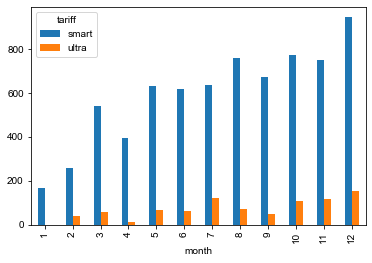

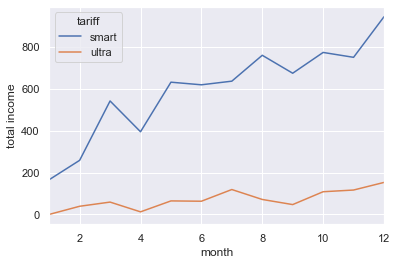

In [74]:
pd.pivot_table(df_merged, index= 'month', columns= 'tariff', values= "monthly_income", aggfunc='mean').plot(kind= 'bar');
sns.set()  
df_merged.pivot_table("monthly_income", index='month', columns='tariff', aggfunc='mean').plot()
plt.ylabel('total income');

These graphs clearly show which subscribers generate the most revenue.
The graphs display the net monthly revenue without including the monthly subscription fee.

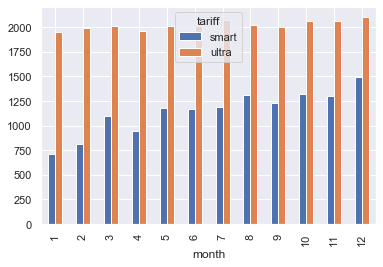

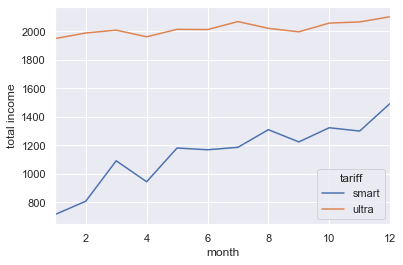

In [75]:
pd.pivot_table(df_merged, index= 'month', columns= 'tariff', values= "final_monthly_income", aggfunc='mean').plot(kind= 'bar');
sns.set()  
df_merged.pivot_table("final_monthly_income", index='month', columns='tariff', aggfunc='mean').plot()
plt.ylabel('total income');

<font color="blue"> In these graphs, which include the monthly subscription fee, it is visible that the average revenue for the Ultra plan is higher than for the Smart plan.
It is also noticeable that the Ultra plan provides stable revenue around the monthly fee, whereas the Smart plan revenue grows monthly, as it generates extra revenue beyond the plan cost. </font>

In [76]:
income_pivot = df_merged.pivot_table( index='tariff', columns='month' , values= "final_monthly_income", aggfunc='mean')
income_pivot

month,1,2,3,4,5,6,7,8,9,10,11,12
tariff,,,,,,,,,,,,
smart,715.935484,808.520000,1092.188406,945.093750,1181.942623,1169.482270,1186.810345,1310.495050,1224.77027,1324.079051,1300.780669,1494.720280
ultra,1950.000000,1988.928571,2008.920000,1962.289474,2014.562500,2013.031746,2068.942029,2021.481928,1997.00000,2058.412371,2066.523364,2102.900901


### Customer Behavior Analysis
#### Based on the sample, analyze:
   How many minutes of calls, messages, and how much internet traffic users of each tariff require per month.
   Calculate mean, variance, and standard deviation.
   Plot histograms and describe the distributions.

In [77]:
df_merged.head()

,user_id,month,tariff,count,sum,calls_profit,id,messages_profit,city,mb_used,internet_profit,monthly_fee,monthly_income,final_monthly_income
0,1000,5,ultra,22,164.0,0.0,22,0.0,Краснодар,2254.49,0.0,1950,0.0,1950.0
1,1000,6,ultra,43,187.0,0.0,60,0.0,Краснодар,23238.77,0.0,1950,0.0,1950.0
2,1000,7,ultra,47,346.0,0.0,75,0.0,Краснодар,14004.64,0.0,1950,0.0,1950.0
3,1000,8,ultra,52,418.0,0.0,81,0.0,Краснодар,14057.93,0.0,1950,0.0,1950.0
4,1000,9,ultra,58,478.0,0.0,57,0.0,Краснодар,14570.91,0.0,1950,0.0,1950.0


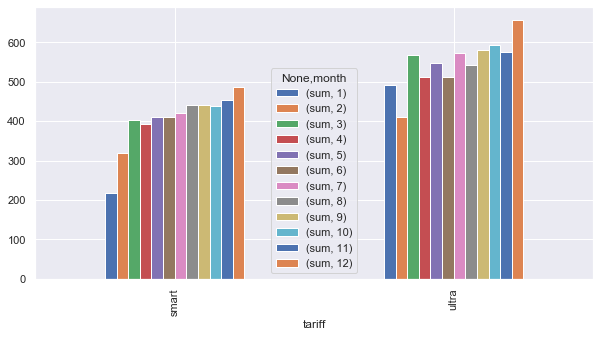

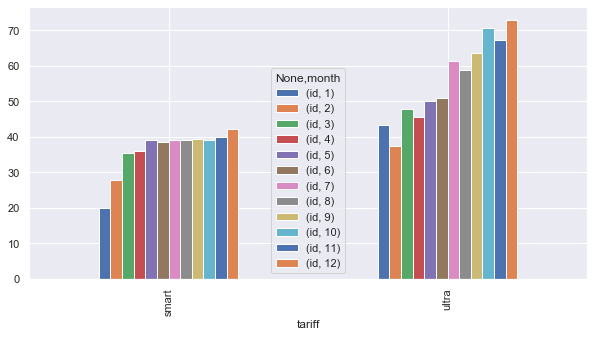

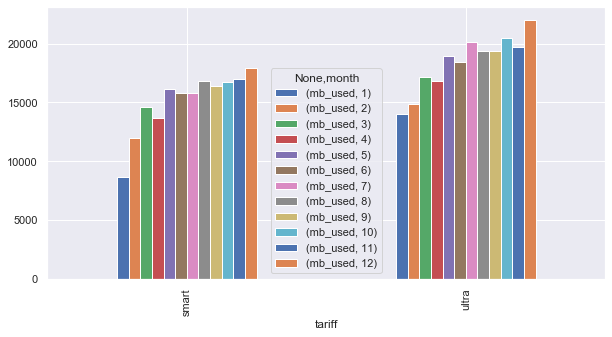

In [78]:
for param in ['sum'],['id'],['mb_used'] :
    pd.pivot_table(df_merged, index='tariff', columns='month' , values= param).plot(kind= 'bar',figsize=(10,5));

In [79]:
pivot_mean_std_var = df_merged.pivot_table(index='month', columns='tariff' , values=('sum','id','mb_used'), aggfunc=('mean','std','var'))
pivot_mean_std_var

id                                                            \
             mean                   std                    var                
tariff      smart      ultra      smart      ultra       smart        ultra   
month                                                                         
1       20.000000  43.428571  15.878707  27.663798  252.133333   765.285714   
2       27.940000  37.285714  20.987275  25.694742  440.465714   660.219780   
3       35.550725  47.800000  25.880117  42.739521  669.780477  1826.666667   
4       35.864583  45.447368  22.756662  37.567739  517.865680  1411.334993   
5       39.032787  50.041667  25.274014  40.702845  638.775776  1656.721631   
6       38.510638  50.888889  27.133431  41.018922  736.223100  1682.551971   
7       38.988506  61.289855  26.820747  44.175486  719.352468  1951.473572   
8       39.044554  58.903614  27.664353  43.802387  765.316413  1918.649133   
9       39.252252  63.544444  26.560260  42.151989  705.447393  1776.790137   
10      39.154150  70.762887  27.168419  48.344634  738.122969  2337.203608   
11      39.955390  67.242991  26.693357  46.587277  712.535316  2170.374361   
12      42.290210  72.990991  28.899518  47.539552  835.182149  2260.009009   

             mb_used                                                         \
                mean                        std                         var   
tariff         smart         ultra        smart         ultra         smart   
month                                                                         
1        8690.746452  13990.481429  6421.056031   5374.203428  4.122996e+07   
2       11945.662000  14894.278571  5960.013492  11327.499609  3.552176e+07   
3       14647.501304  17130.764800  5824.806798  10972.019043  3.392837e+07   
4       13664.030208  16823.118947  5540.174348   8538.396747  3.069353e+07   
5       16162.248852  18936.759792  5663.100471   9632.501694  3.207071e+07   
6       15803.128652  18484.970952  5818.717369   8879.933139  3.385747e+07   
7       15831.036609  20163.066232  5764.216147   9686.925682  3.322619e+07   
8       16854.989257  19392.180602  5572.813712   9868.074747  3.105625e+07   
9       16380.952342  19392.497556  5241.568481   9063.874611  2.747404e+07   
10      16781.503636  20501.591134  5905.231094   9683.089570  3.487175e+07   
11      16982.601041  19716.830467  5157.793277   9752.990710  2.660283e+07   
12      17922.624021  22034.351351  5559.929813   9708.079773  3.091282e+07   

                             sum                                      \
                            mean                     std               
tariff         ultra       smart       ultra       smart       ultra   
month                                                                  
1       2.888206e+07  216.580645  491.000000  160.060150  276.946445   
2       1.283122e+08  319.800000  410.285714  199.515638  340.280750   
3       1.203852e+08  403.652174  567.720000  199.532013  378.998628   
4       7.290422e+07  391.895833  512.500000  188.244716  277.198412   
5       9.278509e+07  410.901639  547.250000  188.664441  294.722769   
6       7.885321e+07  410.333333  511.190476  173.902792  318.075101   
7       9.383653e+07  420.132184  573.666667  182.300171  310.245096   
8       9.737890e+07  441.460396  541.638554  188.407442  319.438363   
9       8.215382e+07  440.527027  579.777778  184.124925  321.101467   
10      9.376222e+07  439.636364  592.536082  189.133326  327.811590   
11      9.512083e+07  452.691450  575.364486  178.086946  306.652972   
12      9.424681e+07  486.919580  657.180180  205.580421  331.667610   

                                     
                 var                 
tariff         smart          ultra  
month                                
1       25619.251613   76699.333333  
2       39806.489796  115790.989011  
3       39813.024297  143639.960000  
4       35436.073246   76838.959459  
5       35594.271237   86861

1. On average, Smart plan subscribers make 250 to 550 minutes of calls per month throughout the year, while Ultra plan subscribers make 500 to 800 minutes.
2. On average, Smart plan subscribers send 20 to 40 messages per month, whereas Ultra plan subscribers send 40 to 75 messages.
3. On average, Smart plan subscribers use 10,000 to 20,000 MB of internet per month, while Ultra plan subscribers use 15,000 to 23,000 MB.

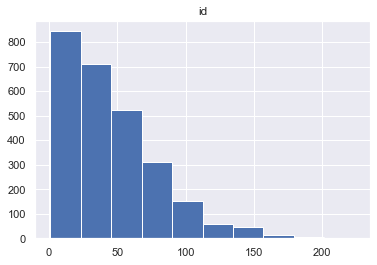

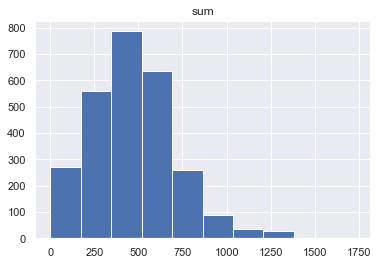

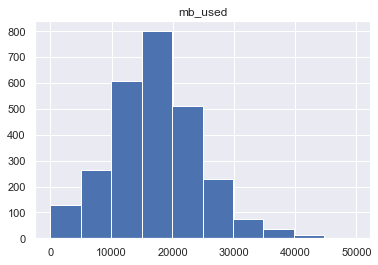

In [80]:
for column in ['id'],['sum'],['mb_used']:
    df_merged.hist(column=column, bins=10);

All three histograms show a positive skew for the columns: number of messages, call duration, and MB used.
1. For the messages histogram, the median is shifted to the left, so the mean number of messages will be higher.
2. For the calls and MB histograms, the median and mean will not differ much, as the distribution is nearly symmetric.

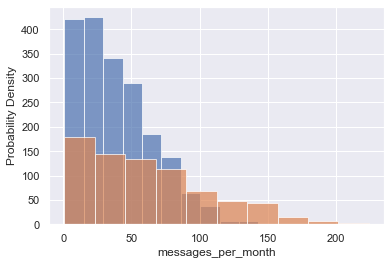

In [81]:
df_merged.groupby('tariff')['id'].plot(kind='hist',alpha=0.7)
plt.xlabel('messages_per_month')
plt.ylabel('Probability Density'); 

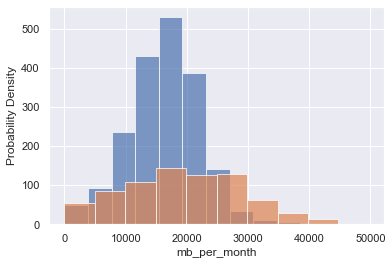

In [82]:
df_merged.groupby('tariff')['mb_used'].plot(kind='hist', alpha=0.7)
plt.xlabel('mb_per_month')
plt.ylabel('Probability Density'); 

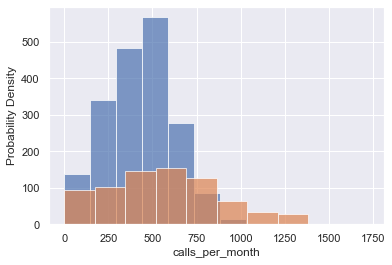

In [83]:
df_merged.groupby('tariff')['sum'].plot(kind='hist', alpha=0.7)
plt.xlabel('calls_per_month')
plt.ylabel('Probability Density'); 

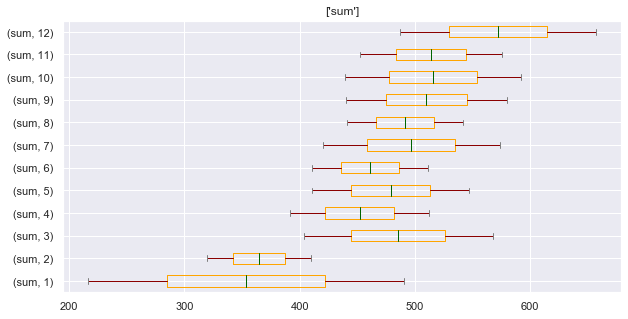

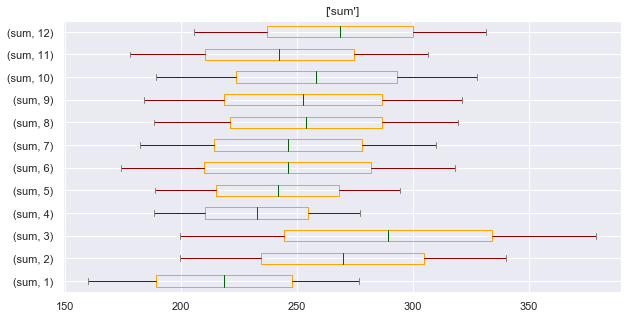

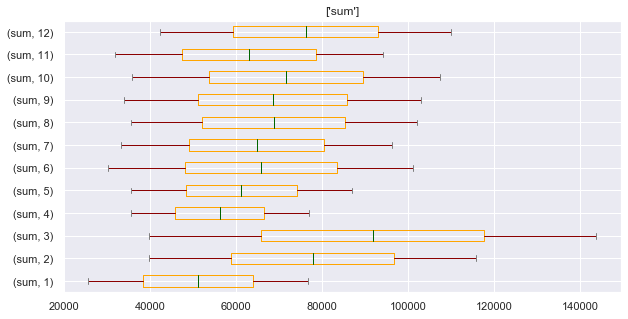

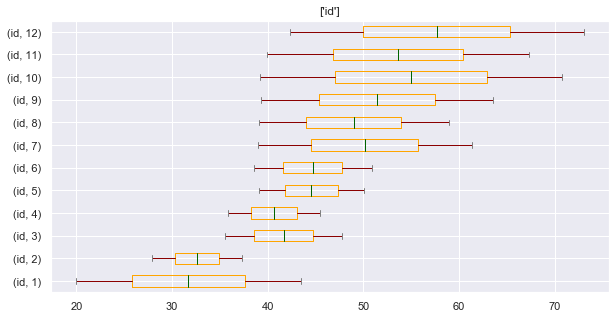

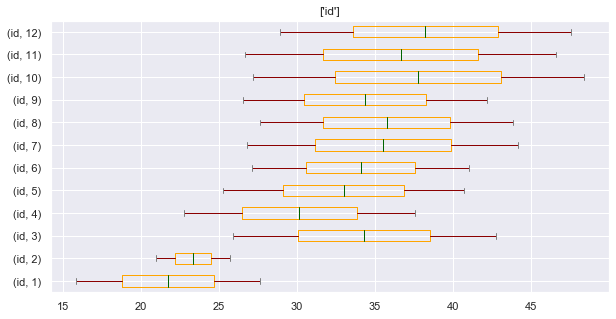

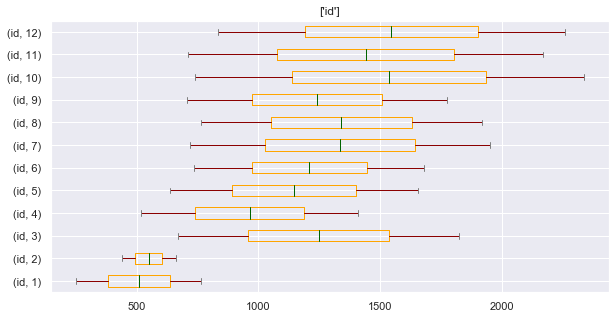

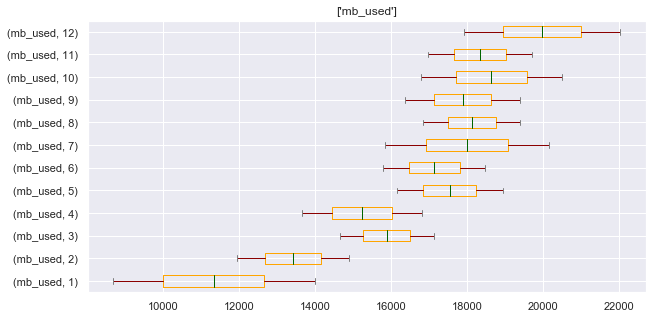

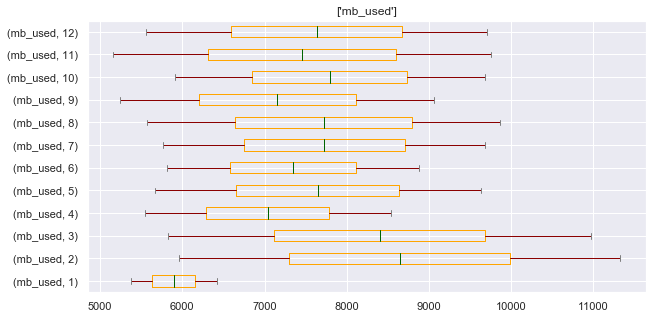

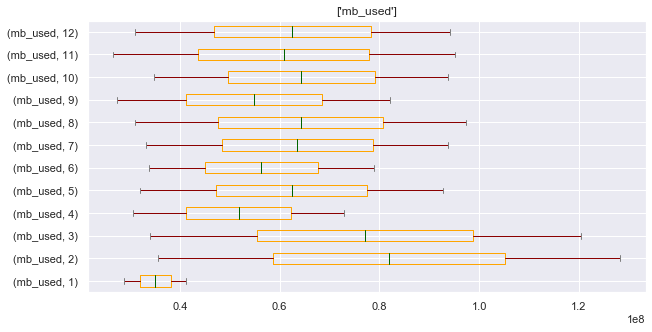

In [84]:
color = {'boxes': 'Orange', 'whiskers': 'DarkRed','medians': 'DarkGreen', 'caps': 'Gray'}
for param in ['sum'],['id'],['mb_used'] :
    pd.pivot_table(df_merged, index='tariff', columns='month' , values= param, aggfunc='mean').plot(vert=False,title=f'{param}',color=color,kind= 'box',figsize=(10,5));
    pd.pivot_table(df_merged, index='tariff', columns='month' , values= param, aggfunc='std').plot(vert=False,title=f'{param}',color=color,kind= 'box',figsize=(10,5));
    pd.pivot_table(df_merged, index='tariff', columns='month' , values= param, aggfunc='var').plot(vert=False,title=f'{param}',color=color,kind= 'box',figsize=(10,5));

### Conclusion

1. On average, Smart plan subscribers make 250 to 550 minutes of calls per month throughout the year, while Ultra plan subscribers make 500 to 800 minutes.
2. On average, Smart plan subscribers send 20 to 40 messages per month, whereas Ultra plan subscribers send 40 to 75 messages.
3. On average, Smart plan subscribers use 10,000 to 20,000 MB of internet per month, while Ultra plan subscribers use 15,000 to 23,000 MB.

## Hypothesis: 
##### The average revenue of Ultra and Smart plan users differs.

In [85]:
from scipy import stats as st

### Hypothesis: The average revenue of Ultra and Smart plan users differs.

##### This is a test of equality of means for the two populations.

In [88]:
df_smart = df_merged.query('tariff == "smart"')

In [89]:
df_ultra = df_merged.query('tariff == "ultra"')

According to the hypothesis, the average revenue for Ultra and Smart plans should be equal. We will check the p-value.

In [92]:
# Двусторонняя гипотеза
alpha = .05

results = st.ttest_ind(df_smart['final_monthly_income'], df_ultra['final_monthly_income'],equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    

p-значение: 2.871850938727536e-238
Отвергаем нулевую гипотезу


Based on the results, the average revenue for Ultra and Smart plans differs.

In [93]:
df_smart['final_monthly_income'].mean()

1249.7754569190602

In [94]:
df_ultra['final_monthly_income'].mean()

2040.2672872340424

In [95]:
df_merged['final_monthly_income'].mean()

1472.6662917135359

In [96]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


#### One-sided Hypothesis
Assume the null hypothesis H0: the average monthly revenue for Megaline users is 2500, based on the tariffs Smart = 550 and Ultra = 1950.
The alternative hypothesis Ha: the average monthly revenue of users is greater than 2500.

In [110]:

incomes = df_merged['final_monthly_income']
interested_value = 1500

alpha = .05

results = st.ttest_1samp(incomes, interested_value) 

print('p-значение:', results.pvalue / 2)

if ( results.pvalue / 2 < alpha) and (incomes.mean() > interested_value):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.03590782251400309
Не получилось отвергнуть нулевую гипотезу


In [98]:
np.mean(incomes)

1472.6662917135359

Based on the results, we failed to reject H0, which means that the average monthly revenue is indeed higher than the specified value.

### The average revenue of users from Moscow differs from the revenue of users from other regions.

##### Hypothesis: Equality of means for two populations.

Также применим эту гипотезу, согласно которой средняя выручка для тарифов «Ультра» и «Смарт» должны равняться друг другу. Проверим р-value

In [104]:
# Вывела в новый датасет только значения для Москвы
df_moscow = df_merged.query('city == "Москва"')

In [105]:
# Вывела в новый датасет значения для всех остальных регионов
df_other_cities = df_merged.query('city != "Москва"')

In [106]:
alpha = .05

results = st.ttest_ind(df_moscow['final_monthly_income'], df_other_cities['final_monthly_income'],equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.08985473396684146
Не получилось отвергнуть нулевую гипотезу


Indeed, after checking the mean values for the two datasets, we find that they are approximately equal.

In [107]:
df_moscow['final_monthly_income'].mean()

1525.448065173116

In [108]:
df_other_cities['final_monthly_income'].mean()

1460.7564338235295

### 5. Overall Conclusion
The Smart plan generates 1.5 to 3 times more revenue monthly beyond the base tariff cost, whereas the Ultra plan provides higher and stable monthly revenue, approximately equal to the tariff cost.

After calculating revenue, plotting graphs, and testing hypotheses, we can draw the following conclusions:
1. Messages generate the least revenue, as subscribers use this service the least.
2. Subscribers mostly make calls and use MBs.
3. The revenue graph shows that Smart plan users contribute the highest monthly net revenue without the tariff cost, effectively overpaying up to 3 times each month, even though Ultra plan users make more calls, send more messages, and use more MBs, providing the highest stable final profit.
4. December is the month with the highest usage of calls, messages, and MBs, and accordingly, it brings the most revenue.
5. According to the hypothesis, revenue from Moscow alone is almost equal to the combined revenue from all other regions.